In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

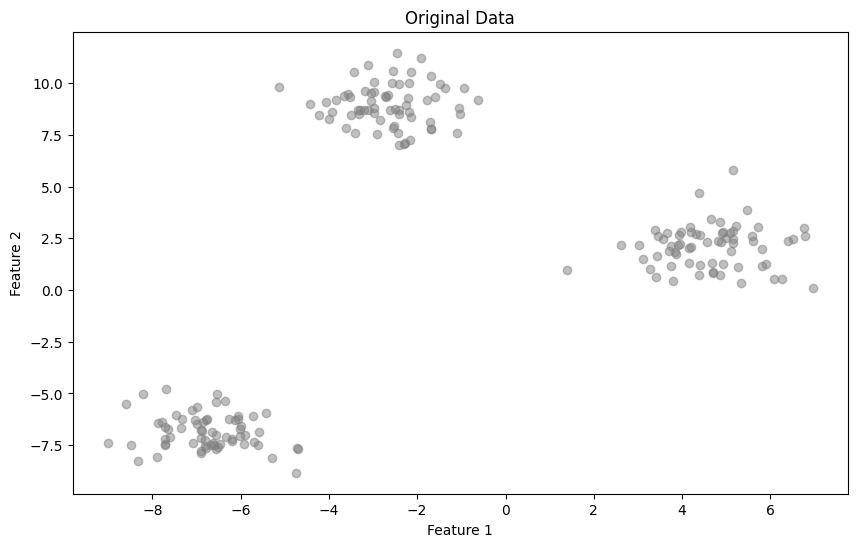

Dataset shape: (200, 2)


In [2]:
X, y = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("Dataset shape:", X.shape)

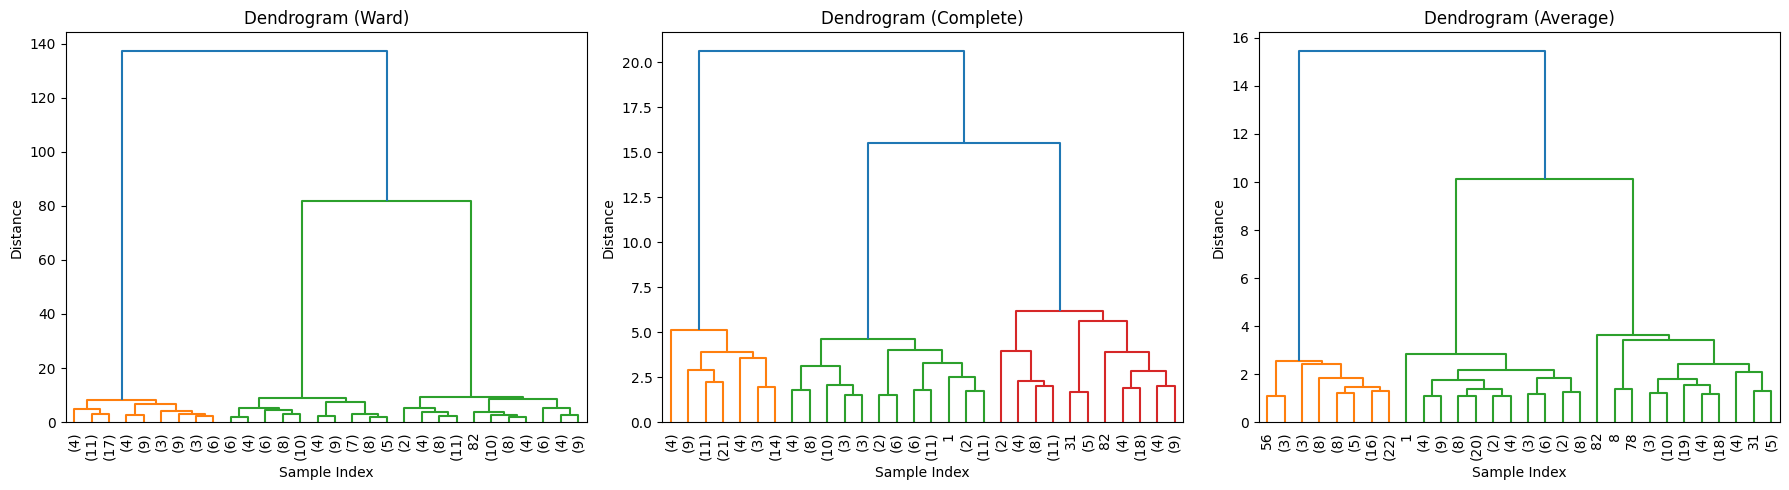

In [3]:
linkage_methods = ['ward', 'complete', 'average']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)
    dendrogram(Z, ax=axes[i], truncate_mode='lastp', p=30, leaf_rotation=90)
    axes[i].set_title(f'Dendrogram ({method.capitalize()})')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

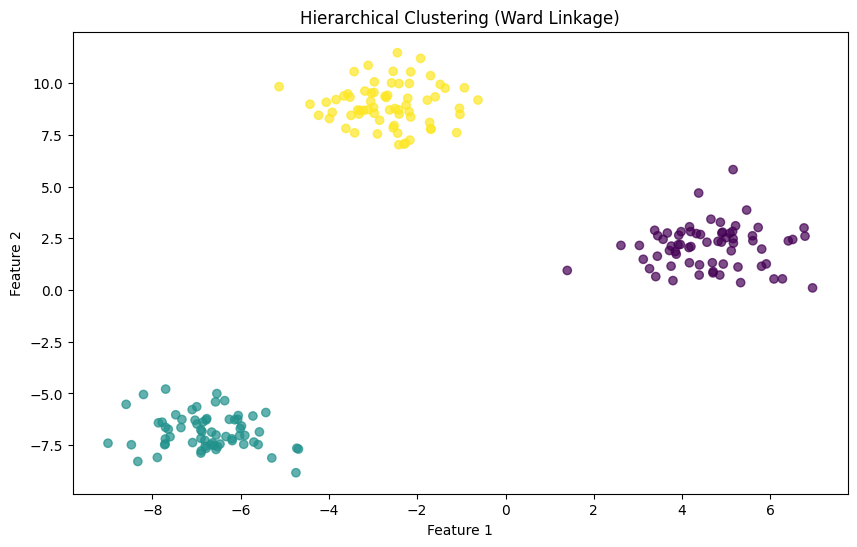


--- Hierarchical Clustering ---
Linkage: Ward
Number of Clusters: 3
Silhouette Score: 0.8467


In [4]:
n_clusters = 3

agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

sil_score = silhouette_score(X, labels)
print(f"\n--- Hierarchical Clustering ---")
print(f"Linkage: Ward")
print(f"Number of Clusters: {n_clusters}")
print(f"Silhouette Score: {sil_score:.4f}")